<a href="https://colab.research.google.com/github/soom1nb/Introduction-to-Computer-Vision/blob/main/KNN(CIFAR_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Introduction to Computer Vision]
## K-Neareast Neighbors(KNN) Classification Assignment
**Student:** Baik Soo Min  
**Student ID:** 2022112338  
**Major:** Data Science

# **1. Import & Install**

In [ ]:
!pip install faiss-cpu

In [ ]:
import faiss
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold

# **2. CIFAR-10 Dataset**
- Dataset Loading and Preprocessing
- Load CIFAR-10 dataset from Keras

In [ ]:
# Dataset Loading and Preprocessing
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

print(f"Train: {x_train.shape}, Test: {x_test.shape}")

# Flatten and normalize
x_train = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255.0
x_test = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255.0

print("Train (flattened):", x_train.shape)
print("Test  (flattened):", x_test.shape)

Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)
Train (flattened): (50000, 3072)
Test  (flattened): (10000, 3072)


# **3. KNN class(based FAISS)**
- Uses L2 distance to measure similarity between vectors
- Uses FAISS to reduce computation time for KNN on CIFAR-10

In [ ]:
class KNearestNeighbor:
    def __init__(self):
        self.index = None
        self.y_train = None

    def train(self, X, y):
        X = X.astype('float32')
        self.index = faiss.IndexFlatL2(X.shape[1])  # L2 distance
        self.index.add(X)
        self.y_train = y

    def predict(self, X, k=5):
        X = X.astype('float32')
        distances, indices = self.index.search(X, k)
        y_pred = np.zeros(X.shape[0], dtype=int)
        for i in tqdm(range(X.shape[0]), desc="Predicting"):
            nearest_labels = self.y_train[indices[i]]
            y_pred[i] = np.bincount(nearest_labels).argmax()
        return y_pred

# **4. Train/Test Split Evaluation**

In [ ]:
knn = KNearestNeighbor()
knn.train(x_train, y_train)
y_pred_test = knn.predict(x_test, k=5)

acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test, average='macro')
rec = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

print(f"Test Performance (k=5):")
print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 192552.07it/s]

Test Performance (k=5):
Accuracy: 0.3398, Precision: 0.4304, Recall: 0.3398, F1: 0.3260


# **5. Train/Validation/Test Split for Hyperparameter Tuning**
- Split training data into training (80%) and validation (20%)

Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 348069.24it/s]


k=1 Validation Accuracy: 0.3357


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 203212.40it/s]


k=3 Validation Accuracy: 0.3215


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 337157.28it/s]


k=5 Validation Accuracy: 0.3325


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 346456.31it/s]


k=7 Validation Accuracy: 0.3296


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 362960.94it/s]


k=9 Validation Accuracy: 0.3309


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 379341.58it/s]


k=11 Validation Accuracy: 0.3268


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 188326.07it/s]


k=13 Validation Accuracy: 0.3231

Best k from Validation: 1


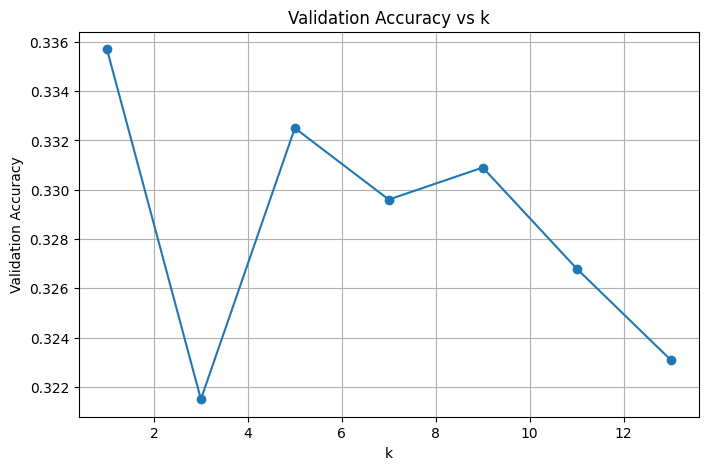

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
k_values = [1, 3, 5, 7, 9, 11, 13]
val_acc_list = []

for k in k_values:
    knn = KNearestNeighbor()
    knn.train(X_tr, y_tr)
    y_val_pred = knn.predict(X_val, k=k)
    acc = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(acc)
    print(f"k={k} Validation Accuracy: {acc:.4f}")

best_k = k_values[np.argmax(val_acc_list)]
print(f"\nBest k from Validation: {best_k}")

# Plot Validation Accuracy vs k
plt.figure(figsize=(8,5))
plt.plot(k_values, val_acc_list, marker='o')
plt.title("Validation Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()

# **6. 5-Fold Cross Validation**
- Uses StratifiedKFold to maintain class proportions in each fold


Testing k=1
Fold 1/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 244268.15it/s]


Fold 2/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 372393.39it/s]


Fold 3/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 360971.13it/s]


Fold 4/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 341394.46it/s]


Fold 5/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 377338.31it/s]


Mean Accuracy: 0.3405, Std: 0.0018

Testing k=3
Fold 1/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 370335.08it/s]


Fold 2/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 372198.42it/s]


Fold 3/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 360632.82it/s]


Fold 4/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 367789.13it/s]


Fold 5/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 333452.90it/s]


Mean Accuracy: 0.3236, Std: 0.0024

Testing k=5
Fold 1/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 335008.31it/s]


Fold 2/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 372529.00it/s]


Fold 3/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 367370.35it/s]


Fold 4/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 266058.38it/s]


Fold 5/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 364966.46it/s]


Mean Accuracy: 0.3327, Std: 0.0023

Testing k=7
Fold 1/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 367306.00it/s]


Fold 2/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 366615.74it/s]


Fold 3/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 247101.68it/s]


Fold 4/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 365061.75it/s]


Fold 5/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 220388.62it/s]


Mean Accuracy: 0.3315, Std: 0.0022

Testing k=9
Fold 1/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 370380.86it/s]


Fold 2/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 343882.79it/s]


Fold 3/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 352184.32it/s]


Fold 4/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 366001.50it/s]


Fold 5/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 351702.96it/s]


Mean Accuracy: 0.3335, Std: 0.0020

Testing k=11
Fold 1/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 184468.80it/s]


Fold 2/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 252601.96it/s]


Fold 3/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 328488.39it/s]


Fold 4/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 356676.70it/s]


Fold 5/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 343995.60it/s]


Mean Accuracy: 0.3301, Std: 0.0013

Testing k=13
Fold 1/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 336041.66it/s]


Fold 2/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 230037.90it/s]


Fold 3/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 238567.56it/s]


Fold 4/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 358892.43it/s]


Fold 5/5 ...


Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 333983.95it/s]

Mean Accuracy: 0.3305, Std: 0.0027


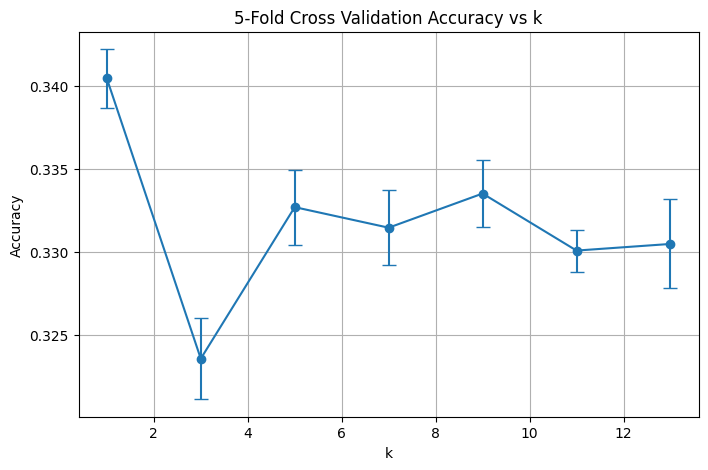

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mean_acc = []
std_acc = []

for k in k_values:
    fold_acc = []
    print(f"\nTesting k={k}")
    for fold, (train_idx, val_idx) in enumerate(kf.split(x_train, y_train)):
        print(f"Fold {fold+1}/5 ...")
        X_tr_fold, X_val_fold = x_train[train_idx], x_train[val_idx]
        y_tr_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        knn = KNearestNeighbor()
        knn.train(X_tr_fold, y_tr_fold)
        y_pred_fold = knn.predict(X_val_fold, k=k)

        acc_fold = accuracy_score(y_val_fold, y_pred_fold)
        fold_acc.append(acc_fold)

    mean_acc.append(np.mean(fold_acc))
    std_acc.append(np.std(fold_acc))
    print(f"Mean Accuracy: {np.mean(fold_acc):.4f}, Std: {np.std(fold_acc):.4f}")

# Plot 5-Fold CV Accuracy
plt.figure(figsize=(8,5))
plt.errorbar(k_values, mean_acc, yerr=std_acc, fmt='-o', capsize=5)
plt.title("5-Fold Cross Validation Accuracy vs k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# **7. Cross Validation Results Visualization**

In [ ]:
knn = KNearestNeighbor()
knn.train(x_train, y_train)
y_test_pred = knn.predict(x_test, k=best_k)

acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred, average='macro')
rec = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')

print(f"Final Test Performance (best k={best_k}):")
print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")

Predicting: 100%|██████████| 10000/10000 [00:00<00:00, 331919.76it/s]

Final Test Performance (best k=1):
Accuracy: 0.3539, Precision: 0.4112, Recall: 0.3539, F1: 0.3495
